In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA Asset Classes

In [3]:
ac = pd.read_csv('Data/asset_classes.csv', parse_dates=True, index_col='Date')
ac.head()

,Amazon,Bitcoin,Crude Oil,DAX,Gold,Netflix,Real Estate,S&P 500,VIX,Zoom,sp_pct_change,vix_pct_change
Date,,,,,,,,,,,,
2019-01-02,1539.130005,NaN,46.540001,10580.190430,1281.000000,267.660004,20.674026,2510.030029,23.219999,NaN,NaN,NaN
2019-01-03,1500.280029,NaN,47.090000,10416.660156,1291.800049,271.200012,20.806313,2447.889893,25.450001,NaN,-0.024757,0.096038
2019-01-04,1575.390015,NaN,47.959999,10767.690430,1282.699951,297.570007,21.061430,2531.939941,21.379999,NaN,0.034336,-0.159921
2019-01-07,1629.510010,NaN,48.520000,10747.809570,1286.800049,315.339996,21.269306,2549.689941,21.400000,NaN,0.007010,0.000936
2019-01-08,1656.579956,NaN,49.779999,10803.980469,1283.199951,320.269989,21.713402,2574.409912,20.469999,NaN,0.009695,-0.043458


In [18]:
ac.shape

(446, 12)

In [4]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 446 entries, 2019-01-02 to 2020-07-06
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amazon          379 non-null    float64
 1   Bitcoin         188 non-null    float64
 2   Crude Oil       399 non-null    float64
 3   DAX             379 non-null    float64
 4   Gold            399 non-null    float64
 5   Netflix         379 non-null    float64
 6   Real Estate     379 non-null    float64
 7   S&P 500         379 non-null    float64
 8   VIX             379 non-null    float64
 9   Zoom            305 non-null    float64
 10  sp_pct_change   445 non-null    float64
 11  vix_pct_change  445 non-null    float64
dtypes: float64(12)
memory usage: 45.3 KB


In [7]:
ac.isna().sum()

Amazon             67
Bitcoin           258
Crude Oil          47
DAX                67
Gold               47
Netflix            67
Real Estate        67
S&P 500            67
VIX                67
Zoom              141
sp_pct_change       1
vix_pct_change      1
dtype: int64

In [21]:
ac.dtypes

Amazon            float64
Bitcoin           float64
Crude Oil         float64
DAX               float64
Gold              float64
Netflix           float64
Real Estate       float64
S&P 500           float64
VIX               float64
Zoom              float64
sp_pct_change     float64
vix_pct_change    float64
dtype: object

In [24]:
ac.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06'],
              dtype='datetime64[ns]', name='Date', length=446, freq=None)

In [5]:
ac.describe()

,Amazon,Bitcoin,Crude Oil,DAX,Gold,Netflix,Real Estate,S&P 500,VIX,Zoom,sp_pct_change,vix_pct_change
count,379.000000,188.000000,399.000000,379.000000,399.000000,379.000000,379.000000,379.000000,379.000000,305.000000,445.000000,445.000000
mean,1923.077361,8488.115671,49.484737,11989.817682,1493.110526,349.832400,24.954245,2940.822579,21.221794,105.761508,0.000633,0.003815
std,270.548791,1285.250529,13.272858,1026.985694,158.208684,48.030758,2.260233,205.430087,12.662535,47.555270,0.016458,0.086796
min,1500.280029,4970.788086,-2.720000,8441.709961,1269.300049,254.589996,16.776085,2237.399902,11.540000,62.000000,-0.119841,-0.233735
25%,1762.834961,7425.122803,44.664999,11425.720215,1323.450012,312.384995,23.782692,2823.694946,13.710000,73.330002,-0.002652,-0.043964
50%,1843.550049,8908.376953,54.189999,12096.400391,1492.300049,352.209991,25.161337,2933.679932,15.930000,90.160004,0.000000,0.000000
75%,1963.204956,9464.613282,58.085001,12623.890137,1602.599976,371.095001,26.791759,3077.525024,22.659999,116.800003,0.005839,0.028081
max,2890.300049,10326.054688,66.300003,13789.000000,1800.400024,485.640015,29.229998,3386.149902,82.690002,261.739990,0.093828,0.479507


## Plots

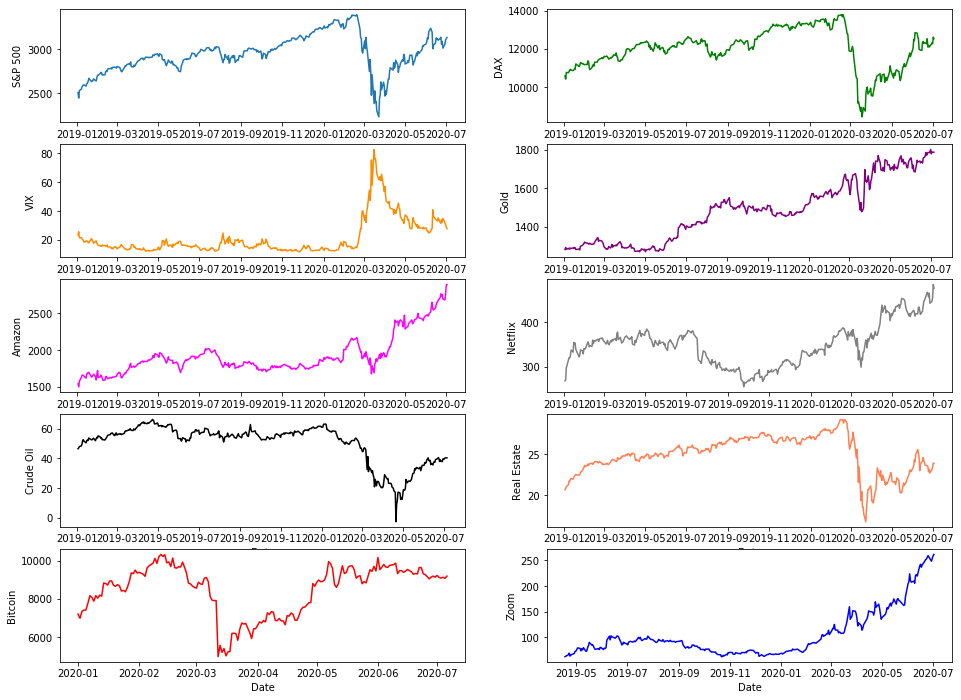

In [164]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,12))

sns.lineplot(data=ac, x=ac.index, y='S&P 500', ax=ax[0, 0])
sns.lineplot(data=ac, x=ac.index, y='VIX', ax=ax[1, 0], color='darkorange')
sns.lineplot(data=ac, x=ac.index, y='Amazon', ax=ax[2, 0], color='magenta')
sns.lineplot(data=ac, x=ac.index, y='Crude Oil', ax=ax[3, 0], color='black')
sns.lineplot(data=ac, x=ac.index, y='Bitcoin', ax=ax[4, 0], color='red')

sns.lineplot(data=ac, x=ac.index, y='DAX', ax=ax[0, 1], color='green')
sns.lineplot(data=ac, x=ac.index, y='Gold', ax=ax[1, 1], color='purple')
sns.lineplot(data=ac, x=ac.index, y='Netflix', ax=ax[2, 1], color='grey')
sns.lineplot(data=ac, x=ac.index, y='Real Estate', ax=ax[3, 1], color='coral')
sns.lineplot(data=ac, x=ac.index, y='Zoom', ax=ax[4, 1], color='blue');

In [167]:
ac_feb_jun = ac.loc['2020-02-01':'2020-06-30']
ac_feb_jun.head()

,Amazon,Bitcoin,Crude Oil,DAX,Gold,Netflix,Real Estate,S&P 500,VIX,Zoom,sp_pct_change,vix_pct_change
Date,,,,,,,,,,,,
2020-02-01,NaN,9392.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2020-02-02,NaN,9344.365234,51.009998,NaN,1593.500000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2020-02-03,2004.199951,9293.521484,50.110001,13045.190430,1577.199951,358.000000,27.635990,3248.919922,17.969999,87.660004,0.007255,-0.046178
2020-02-04,2049.669922,9180.962891,49.610001,13281.740234,1550.400024,369.010010,27.948923,3297.590088,16.049999,85.790001,0.014980,-0.106845
2020-02-05,2039.869995,9613.423828,50.750000,13478.330078,1557.800049,369.670013,27.958704,3334.689941,15.150000,86.989998,0.011251,-0.056075


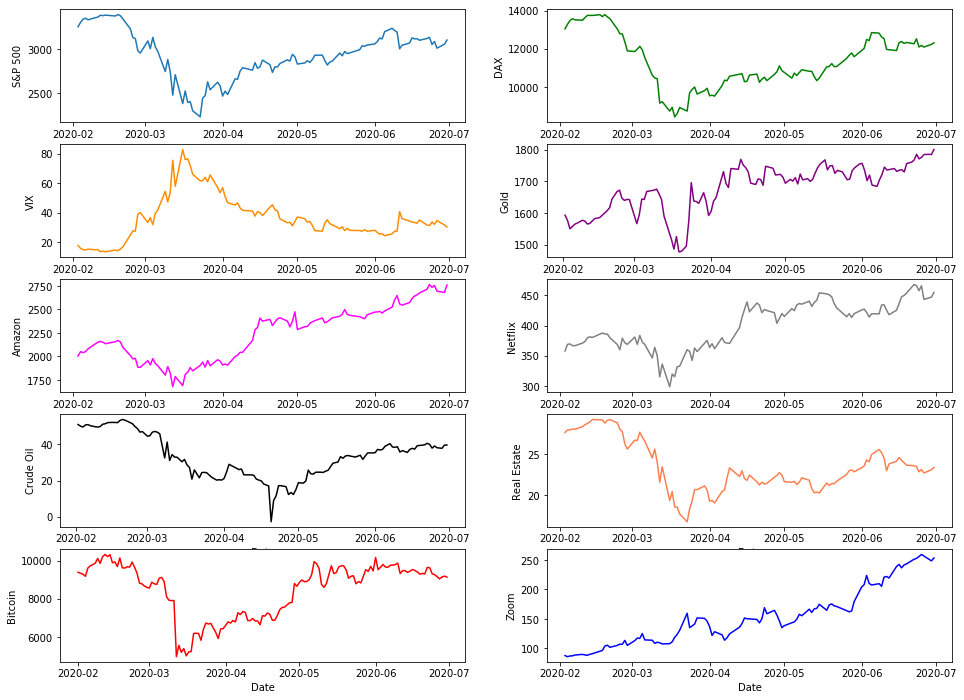

In [168]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,12))

sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='S&P 500', ax=ax[0, 0])
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='VIX', ax=ax[1, 0], color='darkorange')
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='Amazon', ax=ax[2, 0], color='magenta')
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='Crude Oil', ax=ax[3, 0], color='black')
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='Bitcoin', ax=ax[4, 0], color='red')

sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='DAX', ax=ax[0, 1], color='green')
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='Gold', ax=ax[1, 1], color='purple')
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='Netflix', ax=ax[2, 1], color='grey')
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='Real Estate', ax=ax[3, 1], color='coral')
sns.lineplot(data=ac_feb_jun, x=ac_feb_jun.index, y='Zoom', ax=ax[4, 1], color='blue');

## Correlation among the asset classes

In [117]:
ac1 = ac[['S&P 500', 'VIX', 'Amazon', 'Bitcoin', 'Crude Oil', 'Gold', 'Netflix', 'Real Estate', 'Zoom', 'DAX']]
ac1.corr()['S&P 500']

S&P 500        1.000000
VIX           -0.479825
Amazon         0.294746
Bitcoin        0.756706
Crude Oil      0.305774
Gold           0.320444
Netflix        0.021828
Real Estate    0.784646
Zoom          -0.132724
DAX            0.894185
Name: S&P 500, dtype: float64

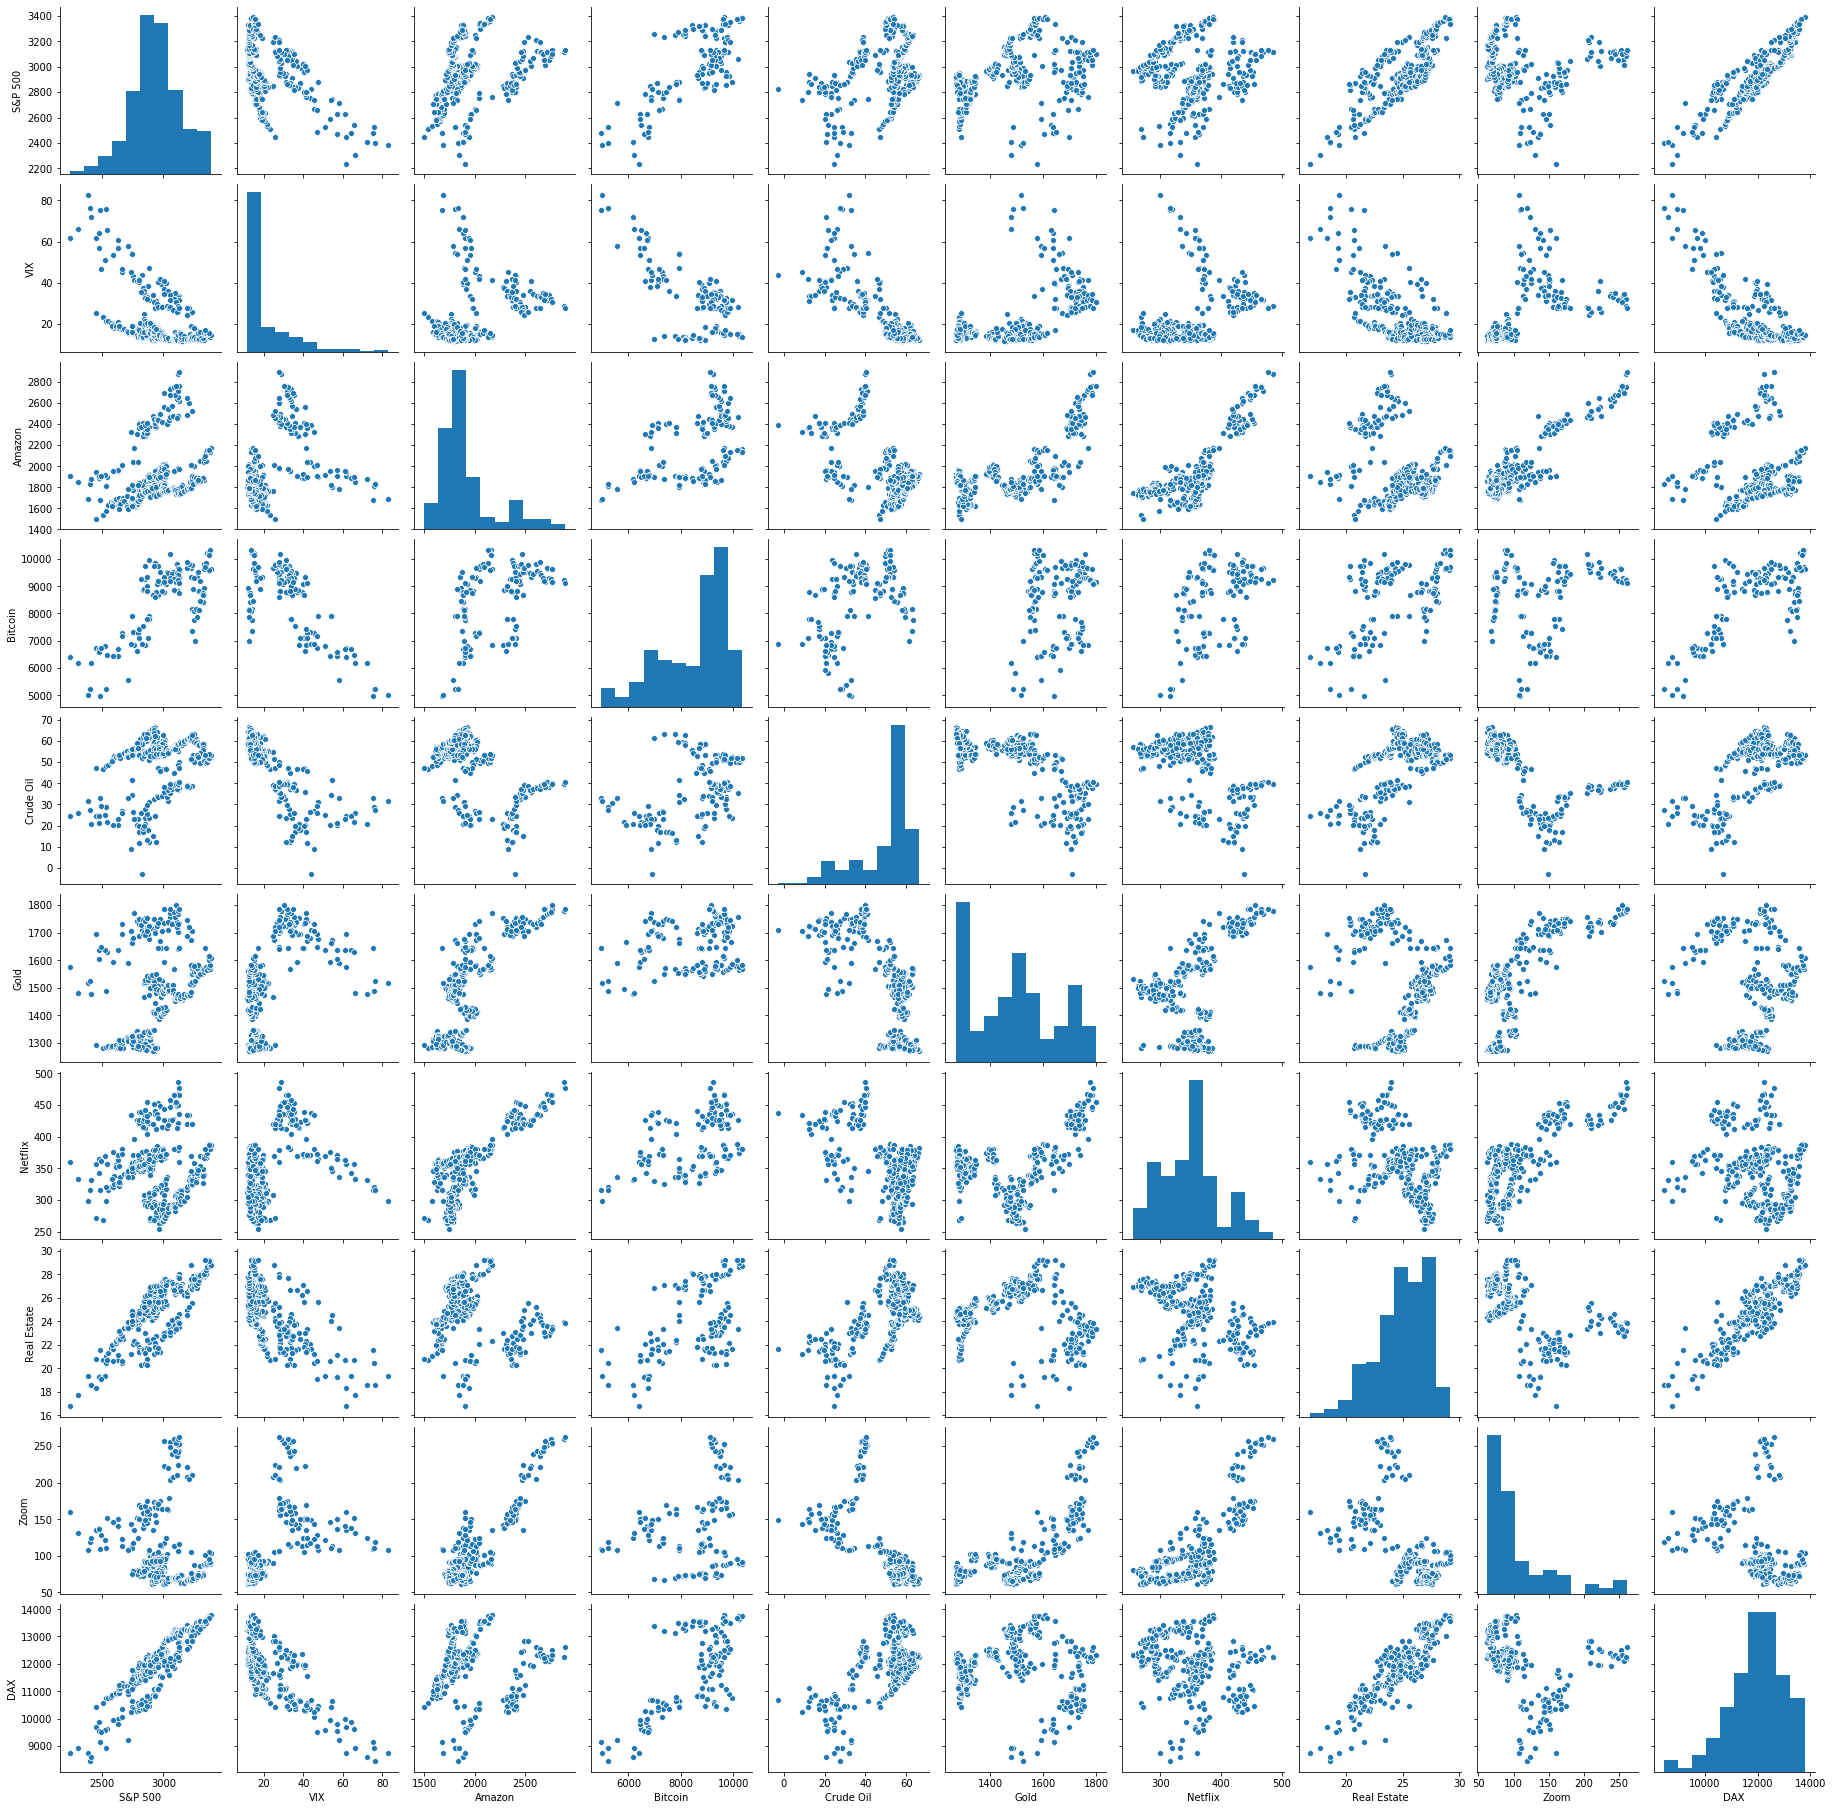

In [119]:
sns.pairplot(ac1);

## Plot the relationship of S&P 500 and VIX (volatility)

In [37]:
sp_vix = ac[['S&P 500', 'VIX']]
sp_vix.head()

,S&P 500,VIX
Date,,
2019-01-02,2510.030029,23.219999
2019-01-03,2447.889893,25.450001
2019-01-04,2531.939941,21.379999
2019-01-07,2549.689941,21.400000
2019-01-08,2574.409912,20.469999


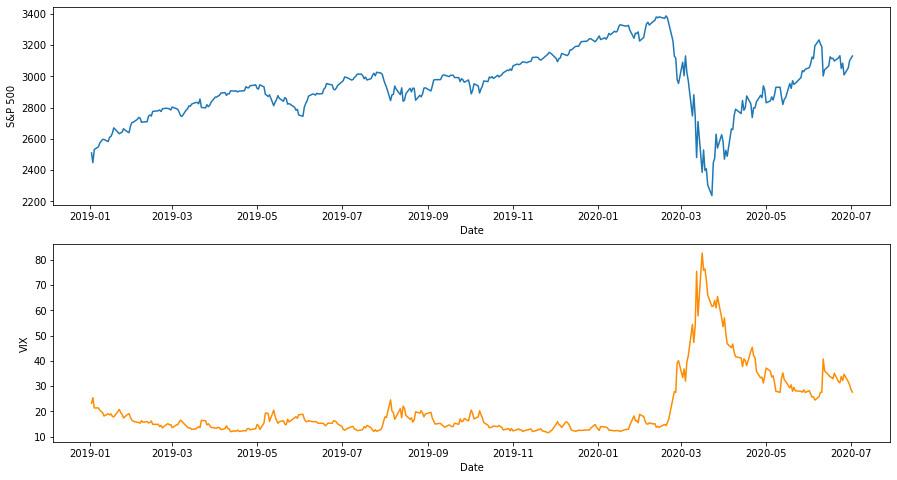

In [127]:
fig, ax = plt.subplots(nrows=2, 
                       ncols=1, 
                       figsize=(15, 8))

sns.lineplot(data=sp_vix, x=sp_vix.index, y='S&P 500', ax=ax[0])
sns.lineplot(data=sp_vix, x=sp_vix.index, y='VIX', ax=ax[1], color='darkorange');

# ax.set_title("Monthly Revenue for Top 3 Categories")


#columns = ['S&P 500', 'VIX']
#
#i=0
#for ax in ax():
#    sns.lineplot(data=sp_vix, x=sp_vix.index, y=columns[i], ax=ax)
#    #ax.set_title(metrics[i])
#    i += 1

In [76]:
# sp_vix_plot = sp_vix.plot(kind='line', rot=45, figsize=(15,8), subplots=True);

In [171]:
sp_vix_feb_jun_sns = sp_vix.loc['2020-02-01':'2020-06-30'].reset_index()
sp_vix_feb_jun_sns.head()

,Date,S&P 500,VIX
0,2020-02-01,NaN,NaN
1,2020-02-02,NaN,NaN
2,2020-02-03,3248.919922,17.969999
3,2020-02-04,3297.590088,16.049999
4,2020-02-05,3334.689941,15.150000


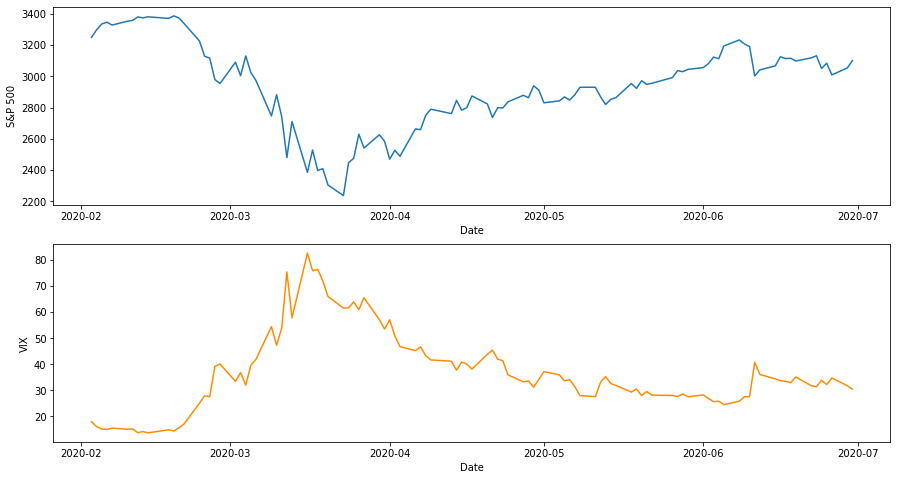

In [172]:
fig, ax = plt.subplots(nrows=2, 
                       ncols=1, 
                       figsize=(15, 8))

sp = sns.lineplot(data=sp_vix_feb_jun_sns, x='Date', y='S&P 500', ax=ax[0])
# sp.axvline('2020-02-19', color='r')
vix = sns.lineplot(data=sp_vix_feb_jun_sns, x='Date', y='VIX', ax=ax[1], color='darkorange');

In [32]:
sp_vix_pct = ac[['sp_pct_change', 'vix_pct_change']]
sp_vix_pct.head()

,sp_pct_change,vix_pct_change
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.024757,0.096038
2019-01-04,0.034336,-0.159921
2019-01-07,0.007010,0.000936
2019-01-08,0.009695,-0.043458


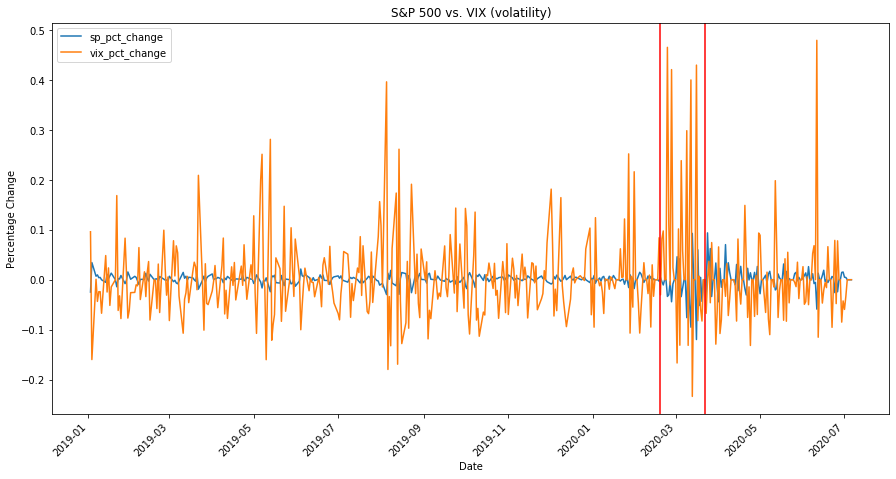

In [33]:
sp_vix_pct_plot = sp_vix_pct.plot(kind='line', rot=45, figsize=(15,8))
sp_vix_pct_plot.axvline('2020-02-19', color='r')
sp_vix_pct_plot.axvline('2020-03-22', color='r')
plt.ylabel('Percentage Change')
plt.title('S&P 500 vs. VIX (volatility)');

In [34]:
sp_vix_pct_feb_apr = sp_vix.loc['2020-02-01':'2020-04-30']

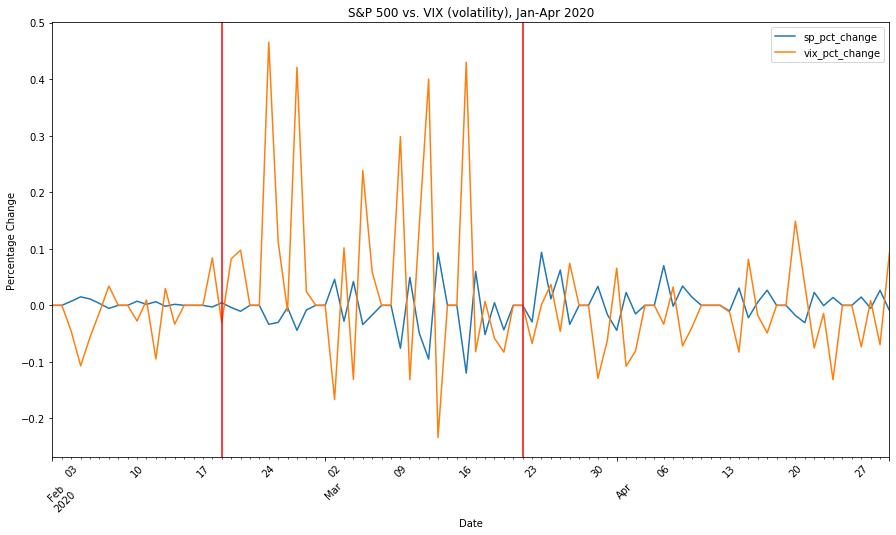

In [35]:
sp_vix_pct_feb_apr_plot = sp_vix_pct_feb_apr.plot(kind='line', rot=45, figsize=(15,8))
sp_vix_pct_feb_apr_plot.axvline('2020-02-19', color='r')
sp_vix_pct_feb_apr_plot.axvline('2020-03-22', color='r')
plt.ylabel('Percentage Change')
plt.title('S&P 500 vs. VIX (volatility), Jan-Apr 2020');

## S&P 500 vs. Macroeconomic Indicators

### 1. Unemployment Rate

In [215]:
unrate = (pd.read_excel('Data/UNRATE (unemployment rate US).xls', 
                        header=10, 
                        parse_dates=True, 
                        index_col='observation_date'))
unrate = unrate.rename(columns={'UNRATE': 'unemployment_rate'})
unrate.head()

,unemployment_rate
observation_date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [205]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 870 entries, 1948-01-01 to 2020-06-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unemployment_rate  870 non-null    float64
dtypes: float64(1)
memory usage: 13.6 KB


In [206]:
type(unrate.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [208]:
unrate_monthly = unrate.copy()
unrate_monthly = monthly_unrate.resample('M').mean()
unrate_monthly = unrate_monthly.rename(columns={'UNRATE': 'unemployment_rate'})
unrate_monthly.head()


,unemployment_rate
observation_date,
1948-01-31,3.4
1948-02-29,3.8
1948-03-31,4.0
1948-04-30,3.9
1948-05-31,3.5


In [209]:
monthly_unrate.shape

(870, 1)

### 2. GDP

In [210]:
gdp_quarterly = (pd.read_excel('Data/GDP (US absolute quarterly).xls', 
                               header=10, 
                               parse_dates=True, 
                               index_col='observation_date'))
gdp_quarterly = gdp_quarterly.rename(columns={'GDP': 'gdp'})
gdp_quarterly.head()

,gdp
observation_date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [211]:
gdp_monthly = gdp_quarterly.copy()
gdp_monthly.resample('M').mean().head()


,gdp
observation_date,
1947-01-31,243.164
1947-02-28,NaN
1947-03-31,NaN
1947-04-30,245.968
1947-05-31,NaN


In [178]:
gdp_monthly = gdp_monthly.resample('M').mean().interpolate()
gdp_monthly.head()

,gdp
observation_date,
1947-01-31,243.164000
1947-02-28,244.098667
1947-03-31,245.033333
1947-04-30,245.968000
1947-05-31,247.173667


In [179]:
gdp_monthly.tail()

,gdp
observation_date,
2019-09-30,21666.929333
2019-10-31,21729.124000
2019-11-30,21665.979000
2019-12-31,21602.834000
2020-01-31,21539.689000


In [180]:
gdp_monthly.shape

(877, 1)

### 3. Debt / GDP

The lower the interest rates the higher the debt rises.
High Debt/GDP correlated with high market (S&P 500) growth might be an indicator of future recession/bubble.

In [181]:
debt_gdp_quarterly = (pd.read_excel('Data/GFDEGDQ188S (debt to GDP quarterly).xls', 
                                    header=10, 
                                    parse_dates=True, 
                                    index_col='observation_date'))
debt_gdp_quarterly = debt_gdp_quarterly.rename(columns={'GFDEGDQ188S': 'debt_per_gdp'})
debt_gdp_quarterly.head()

,debt_per_gdp
observation_date,
1966-01-01,40.33999
1966-04-01,39.26763
1966-07-01,39.62091
1966-10-01,39.51977
1967-01-01,39.20383


In [182]:
debt_gdp_monthly = debt_gdp_quarterly.copy()
debt_gdp_monthly.head()

,debt_per_gdp
observation_date,
1966-01-01,40.33999
1966-04-01,39.26763
1966-07-01,39.62091
1966-10-01,39.51977
1967-01-01,39.20383


In [183]:
debt_gdp_monthly = debt_gdp_monthly.resample('M').mean().interpolate()

In [184]:
debt_gdp_monthly.head()

,debt_per_gdp
observation_date,
1966-01-31,40.339990
1966-02-28,39.982537
1966-03-31,39.625083
1966-04-30,39.267630
1966-05-31,39.385390


In [185]:
debt_gdp_monthly.shape

(649, 1)

### 4. Interest Rate

In [186]:
intrate = (pd.read_excel('Data/DFF (Interest rate daily).xls', 
                         header=10, 
                         parse_dates=True, 
                         index_col='observation_date'))
intrate = intrate.rename(columns={'DFF': 'interest_rate'})
intrate.head()

,interest_rate
observation_date,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
1954-07-04,1.25
1954-07-05,0.88


In [187]:
intrate_monthly = intrate.copy()
intrate_monthly = intrate_monthly.resample('M').mean()
intrate_monthly.head()

,interest_rate
observation_date,
1954-07-31,0.799355
1954-08-31,1.220645
1954-09-30,1.066667
1954-10-31,0.848710
1954-11-30,0.833667


### 5. S&P 500

In [188]:
sp500_long = pd.read_csv('Data/^GSPC (S&P 500 max).csv', parse_dates=True, index_col='Date')
sp500_long = sp500_long.rename(columns={'Adj Close': 'adjusted_closing_price'})
sp500_long.head()

,Open,High,Low,Close,adjusted_closing_price,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [189]:
sp500_long = sp500_long[['adjusted_closing_price']]
sp500_long.head()

,adjusted_closing_price
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [190]:
sp500_monthly = sp500_long.copy()
sp500_monthly = sp500_monthly.resample('M').mean()
sp500_monthly.head()

,adjusted_closing_price
Date,
1927-12-31,17.660000
1928-01-31,17.520000
1928-02-29,17.324211
1928-03-31,18.233182
1928-04-30,19.371000


In [191]:
sp500_monthly.shape

(1112, 1)

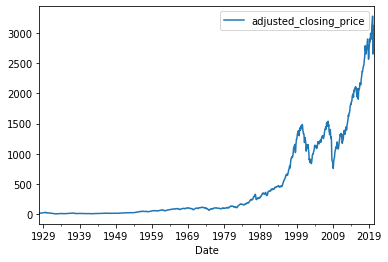

In [192]:
sp500_monthly.plot();

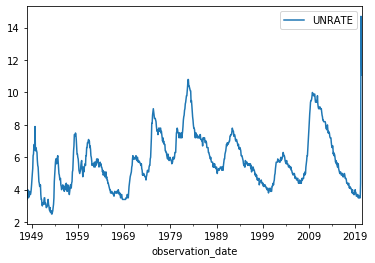

In [193]:
unrate_monthly.plot();

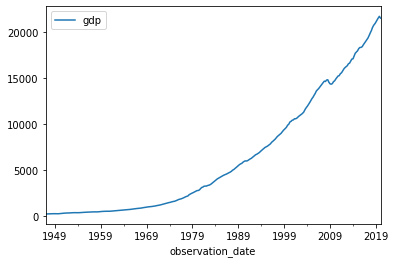

In [194]:
gdp_monthly.plot();

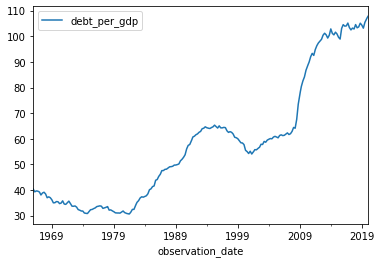

In [195]:
debt_gdp_monthly.plot();

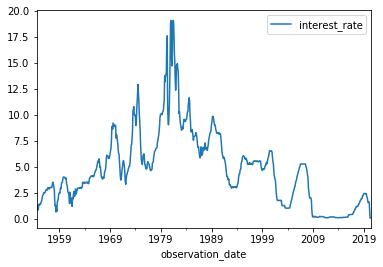

In [196]:
intrate_monthly.plot();

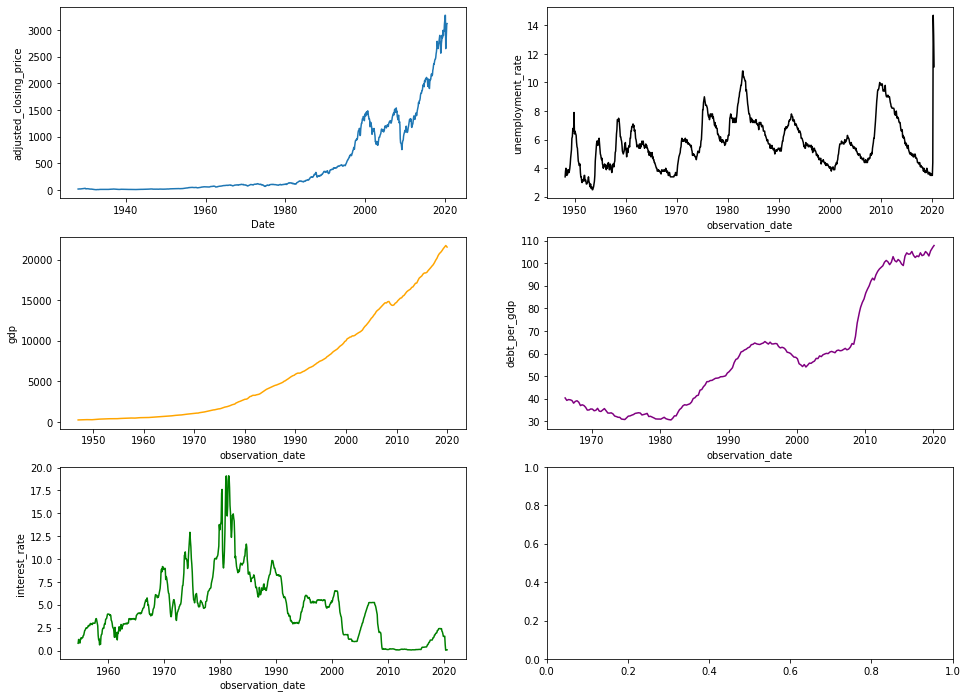

In [212]:
fig, axes = plt.subplots(nrows=3, 
                         ncols=2, 
                         figsize=(16,12))
sns.lineplot(data=sp500_monthly, x=sp500_monthly.index, y='adjusted_closing_price', ax=axes[0,0])
sns.lineplot(data=unrate_monthly, x=unrate_monthly.index, y='unemployment_rate', ax=axes[0,1], color='black')
sns.lineplot(data=gdp_monthly, x=gdp_monthly.index, y='gdp', ax=axes[1,0], color='orange')
sns.lineplot(data=debt_gdp_monthly, x=debt_gdp_monthly.index, y='debt_per_gdp', ax=axes[1,1], color='purple')
sns.lineplot(data=intrate_monthly, x=intrate_monthly.index, y='interest_rate', ax=axes[2,0], color='green');

In [216]:
print('sp500', sp500_monthly.shape)
print('unrate', unrate_monthly.shape)
print('gdp', gdp_monthly)
print('debt per gdp', debt_gdp_monthly)
print('interest rate', intrate_monthly)

sp500 (1112, 1)


,interest_rate
observation_date,
1954-07-31,0.799355
1954-08-31,1.220645
1954-09-30,1.066667
1954-10-31,0.848710
1954-11-30,0.833667
...,...
2020-03-31,0.652258
2020-04-30,0.049000
2020-05-31,0.050000


In [ ]:
macro